# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from __future__ import division

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

E:\DSC\Miniconda\envs\tutorial\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


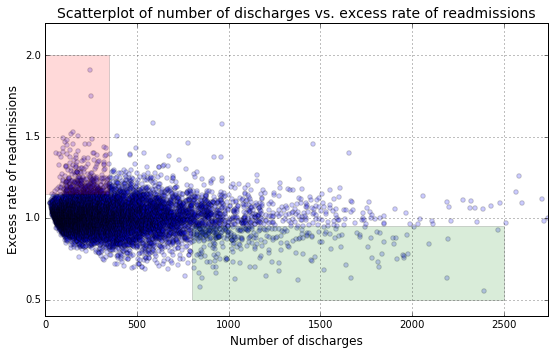

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

# A. Do you agree with the above analysis and recommendations? Why or why not?

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

## Answer:
+ Overall, rate of readmissions is trending down with increasing number of discharges (**No. I don't - see P1**)
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) (**No. I don't - see P2**)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) (**No. I don't - see P3**)



## part P1

In [6]:
# compute the Pearson correlation coefficients between x and y
np.corrcoef(x,y)

array([[ 1.        , -0.09309554],
       [-0.09309554,  1.        ]])

Pearson correlation coefficients (r = -0.09309554) is negative. But it is very close to 0. It means there is nearly no linear relation between number of discharges (x) and rate of readmissions (y).

In [7]:
import statsmodels.api as sm
x_new = sm.add_constant(x)
model_1 = sm.OLS(y,x_new)
res = model_1.fit()

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.50e-23
Time:                        17:00:49   Log-Likelihood:                 11177.
No. Observations:               11494   AIC:                        -2.235e+04
Df Residuals:                   11492   BIC:                        -2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0179      0.001    757.349      0.000         1.015     1.021
x1         -2.857e-05   2.85e-06    -10.023      0.000     -3.42e-05  -2.3e-05
==============================================================================
Omnibus:                     1666.001   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6855.329
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       6.538   Cond. No.                         743.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In addition, the OLS fit results show that R-squared = 0.009. <br>
It supports the conclusion that there is no relation between x and y.

## part P2

In [9]:
# dataframe of discharge vs readmission
df=pd.DataFrame({'discharge':x,'readmission':y})

In [10]:
# lower number of discharges (less than 350)
n1 = len(df[df.discharge <=350])
print('Number of cases with lower number of discharges:', n1)

# in shaded red area
x1 = len(df[df.discharge <=350][df.readmission>=1.15])
print('Number of cases in shaded red area:', x1)

print('Percent of excess rate of readmissions: ', x1/n1*100)

('Number of cases with lower number of discharges:', 7009)
('Number of cases in shaded red area:', 351)
('Percent of excess rate of readmissions: ', 5.0078470537879864)


E:\DSC\Miniconda\envs\tutorial\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


About 5% of excess rate of readmission (shaded red area) in the lower number of dischanges region (<= 350).

## part P3

In [11]:
# higer number of discharges (less than 350)
n2 = len(df[df.discharge >= 800])
print('Number of cases with higher number of discharges:', n2)

x2 = len(df[df.discharge >= 800][df.readmission <= 0.95])
print('Number of cases in shaded green area:', x2)

print('Percent of excess rate of readmissions: ', x2/n2*100)

('Number of cases with higher number of discharges:', 900)
('Number of cases in shaded green area:', 301)
('Percent of excess rate of readmissions: ', 33.44444444444444)


About 33% of excess rate of readmission (shaded green area) in the higher number of dischanges region (>= 800).

___

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 (**Yes. I agree - see P4**)
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 (**No, I don't - see P5**)

## part P4

In [12]:
# In hospitals/facilities with number of discharges < 100
df1 = df[df.discharge < 100]
print('In hospitals/facilities with number of discharges < 100:')
print('Mean excess readmission rate: %.3f'% df1.readmission.mean())
print('Excess readmission rate greater than 1: %.0f' % (len(df1[df1.readmission > 1])/len(df1)*100) + '%')

In hospitals/facilities with number of discharges < 100:
Mean excess readmission rate: 1.023
Excess readmission rate greater than 1: 63%


## part P5

In [13]:
# In hospitals/facilities with number of discharges > 1000
df2 = df[df.discharge > 1000]
print('In hospitals/facilities with number of discharges > 1000:')
print('Mean excess readadmission rate: %.3f' % df2.readmission.mean())
print('excess readmission rate greater than 1: %.0f' % (len(df2[df2.readmission > 1])/len(df2)*100) + '%' )

In hospitals/facilities with number of discharges > 1000:
Mean excess readadmission rate: 0.979
excess readmission rate greater than 1: 45%


___

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. (** No, I don't - see P1**)
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. (** Yes, I agree.**)

---

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. (**Yes, I agree. It is better to keep the range for the definition of small hospital (like <100). **)
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. (**No, I don't.**)

---

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

## Test the correlation of Number of discharges (x) vs Excess rate of readmissions (y)



Set r be the correlation between Number of discharges (x) vs Excess rate of readmissions (y). <br />
Null hypothesis:  r = 0 (it means there is no relation between x and y) <br />
Alternative Hypothesis: r $\neq$ 0 <br />
Statistical significance for $\alpha$ = 0.01

In [14]:
from scipy import stats
r, p1_val = stats.pearsonr(x, y)
alpha = 0.01

print('correlation coefficient:', r)
print('p value =',p1_val)

if p1_val < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

('correlation coefficient:', -0.093095542875904408)
('p value =', 1.5022756426464526e-23)
Ho can be rejected


I got very small p-value (=1.50 e-23). So, there is a a statistically significant correlation for Number of discharges and Excess rate of readmission in 99% confidence.

---

## Lower number of discharges hospitals (< 100) vs Higher number of discharges hospitals (>1000)

In [15]:
lower = df[df['discharge']<100]
higher = df[df['discharge']>1000]

Set s1 and s2 be number of hospitals with lower and higher discharges
Null hypothesis:  There is no difference in mean rate readmission between lower and higher number of discharges hosptial 
$\mu{_1} = \mu{_2} $ <br />
Alternative Hypothesis: $\mu{_1} \neq \mu{_2} $ <br />
Statistical significance for $\alpha$ = 0.01

In [16]:
lower_mean = lower.readmission.mean()
lower_std = lower.readmission.std()

higher_mean = higher.readmission.mean()
higher_std = higher.readmission.std()

z_score = (higher_mean - lower_mean)/np.sqrt(higher_std + lower_std)
p2_value = stats.norm.cdf(z_score)

print('p-value', p2_value)
if p2_value < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')

('p-value', 0.4588206633424281)
Ho cannot be rejected


Based on p-value, there is no difference in readmission rate between high and low discharge hospitals. 

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In practical significance:
* There is no relation between x and y based on Pearson correlation coefficient. 
* The mean of rate readmission of higher discharge hospital is smaller than lower discharge hospital. <br>

In statisfical significance:
* It indicates a significant relation between x and y by computing p-value. 
* There is no diffecence in the mean of rate readmission of higher and lower discharge hospital.

There is a big difference from two approaches. It leads to change the recommendation to the client. <br>
I think we have statistical signicance but not practical significance in this case because of the effect size (For a large sample size, even tiny deviations from the null hypothesis will be significant)



## Look at the scatterplot above.

** What are the advantages and disadvantages of using this plot to convey information?**

Advantages:
- illustrate clearly data (green and red shaded regions)

Disadvantages:
- The trend is not easy to identify (no 'correlation coefficient')
- The distribution of each individual statistic is not displayed

**Construct another plot that conveys the same information in a more direct manner.**

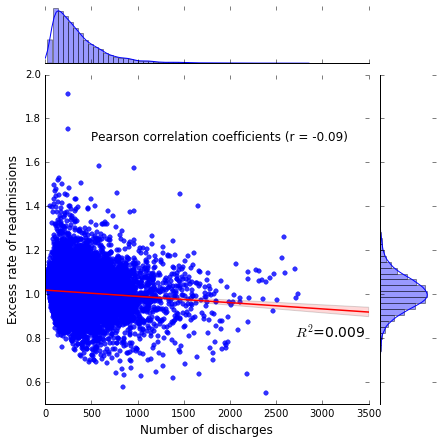

In [17]:
import seaborn as sns
sns.jointplot(x, y, kind='reg',joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.annotate('$R^2$=0.009', xy=(2700, 0.8), xytext=(2700, 0.8), fontsize=14)
plt.annotate('Pearson correlation coefficients (r = -0.09)', xy=(500, 1.7), xytext=(500, 1.7), fontsize=12)
plt.xlim([0,3500])
plt.ylim([0.5,2])
plt.show()